# Corona Cases Plotter

In [1]:
# Import all the modules and shit
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import csv
import datetime as dt

%matplotlib notebook

### Choose Country or Region

In [2]:
# Import the confirmed cases data

wd = ('csse_covid_19_data/'
      'csse_covid_19_time_series/')

conf_filen = 'time_series_covid19_confirmed_global.csv'
conf_rows = []

with open(wd + conf_filen, 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        conf_rows.append(row)
    
dates = conf_rows[0][4:]
x = [dt.datetime.strptime(d,'%m/%d/%y').date() for d in dates]

country_list = [row[1] for row in conf_rows[1:]]
country_list.insert(0, 'global')

In [3]:
# Choose country 

def country_chooser(country):
    return country

count = interactive(country_chooser, country=country_list)
display(count)

interactive(children=(Dropdown(description='country', options=('global', 'Afghanistan', 'Albania', 'Algeria', …

In [49]:
# Print chosen country

country = count.result
print('You chose ' + country + ' as the country you want to look at.')

You chose global as the country you want to look at.


In [50]:
# Create confirmed cases time series for specified country

countries = country_list[1:]
index_list = [i for i in range(len(countries)) 
              if countries[i] == country] 

conf = [0] * len(dates)

if country == 'global':
    for row in conf_rows[1:]:
          for i in range(len(dates)):
            conf[i] += int(row[4+i])

else:
    for i in index_list:
        for j in range(len(dates)):
            conf[j] += int(conf_rows[i+1][4+j])

    

In [51]:
# Import confirmed deaths and create deaths time series for specified country

death_filen = 'time_series_covid19_deaths_global.csv'
death_rows = []

with open(wd + death_filen, 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        death_rows.append(row)

death = [0] * len(dates)

#countries = [row[1] for row in death_rows[1:]]
#if country not in countries:
#    print('Sorry dude, the country or region you specified was not found.\n'
#          'Check your spelling!')

#index_list = [i for i in range(len(countries)) 
#              if countries[i] == country] 

if country == 'global':
    for row in death_rows[1:]:
          for i in range(len(dates)):
            death[i] += int(row[4+i])

else:
    for i in index_list:
        for j in range(len(dates)):
            death[j] += int(death_rows[i+1][4+j])
            

<IPython.core.display.Javascript object>


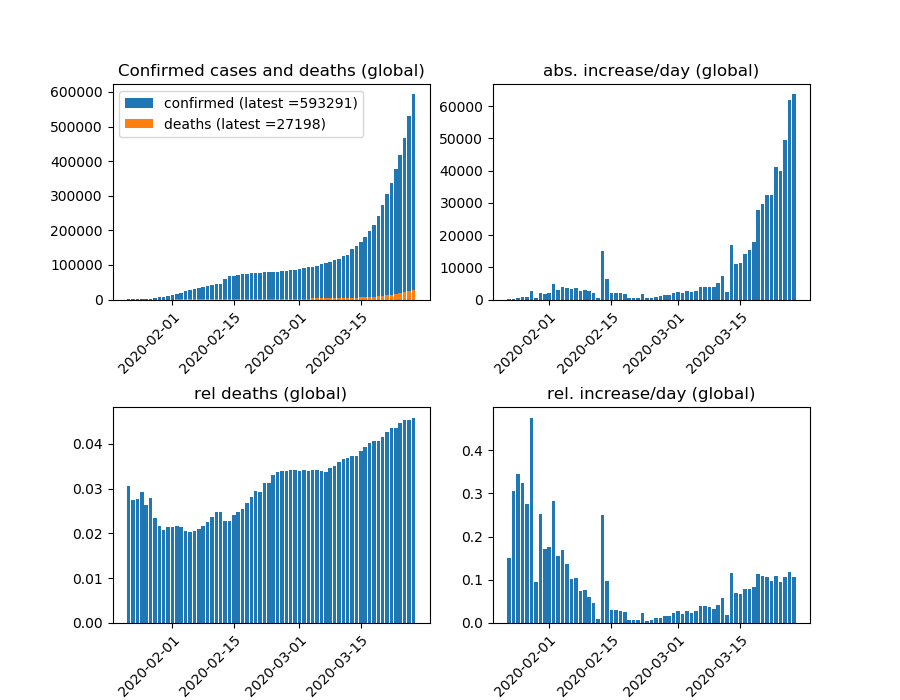

In [52]:
# Plot everything

conf_tmp = conf

for i in range(len(conf_tmp)):
    if conf_tmp[i] != 0:
        j = i
        break
        
death_tmp = death

for i in range(len(death_tmp)):
    if death_tmp[i] != 0:
        k = i
        break
        

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(9, 7), gridspec_kw={'hspace': 0.5})

ax1.set_title('Confirmed cases and deaths (' + country + ')')
ax1.bar(x[j:], conf[j:], label='confirmed (latest =' + str(conf[-1]) + ')')
ax1.bar(x[j:], death[j:], label='deaths (latest =' + str(death[-1]) + ')')

#ax1.set_yscale('log')
ax1.legend()

ax3.set_title('rel deaths ({})'.format(country))
ax3.bar(x[k:], [death[i+k]/conf[i+k] for i in range(len(conf[k:]))])

ax2.set_title('abs. increase/day ({})'.format(country))
ax2.bar(x[j+1:], [conf[i+j+1]-conf[i+j] for i in range(len(conf)-j-1)])

ax4.set_title('rel. increase/day ({})'.format(country))
plt.bar(x[j+1:], [(conf[i+j+1]-conf[i+j])/conf[i+j+1] 
                  for i in range(len(conf)-j-1)])

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax4.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

#fig.autofmt_xdate()

<IPython.core.display.Javascript object>


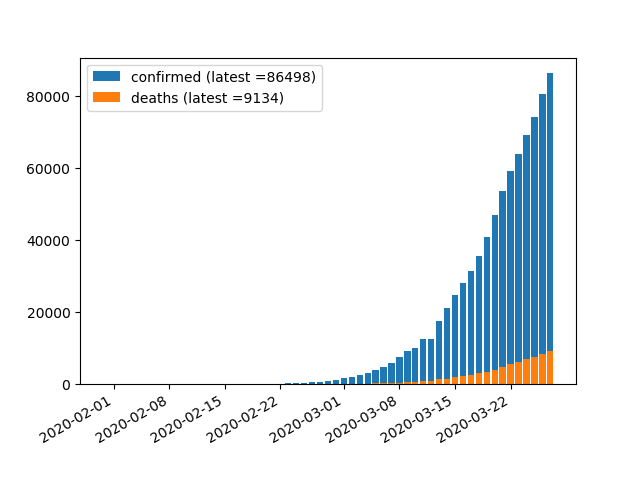

In [32]:
# Plot the confirmed cases and deaths

conf_tmp = conf

for i in range(len(conf_tmp)):
    if conf_tmp[i] != 0:
        j = i
        break
        

plt.close('all')            
plt.figure('cases')
plt.bar(x[j:], conf[j:], label='confirmed (latest =' + str(conf[-1]) + ')')
plt.bar(x[j:], death[j:], label='deaths (latest =' + str(death[-1]) + ')')
#plt.yscale('log')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


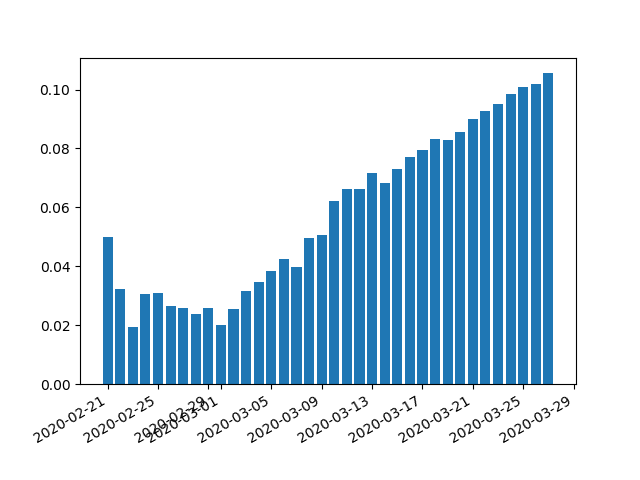

In [33]:
# Plot deaths/cases for each day

death_tmp = death

for i in range(len(death_tmp)):
    if death_tmp[i] != 0:
        k = i
        break

plt.figure('rel deaths')
plt.bar(x[k:], [death[i+k]/conf[i+k] for i in range(len(conf[k:]))])
plt.gcf().autofmt_xdate()
plt.show()

<IPython.core.display.Javascript object>


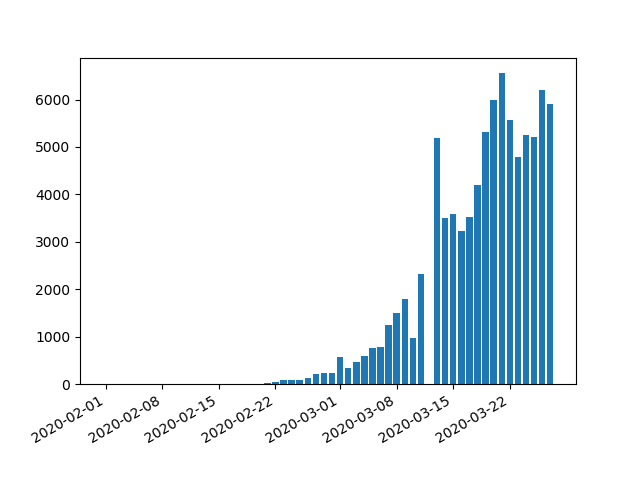

In [34]:
# Plot the absolute increase per day

plt.figure('abs. zunahme pro tag')
plt.bar(x[j+1:], [conf[i+j+1]-conf[i+j] for i in range(len(conf)-j-1)])
plt.gcf().autofmt_xdate()
plt.show()

<IPython.core.display.Javascript object>


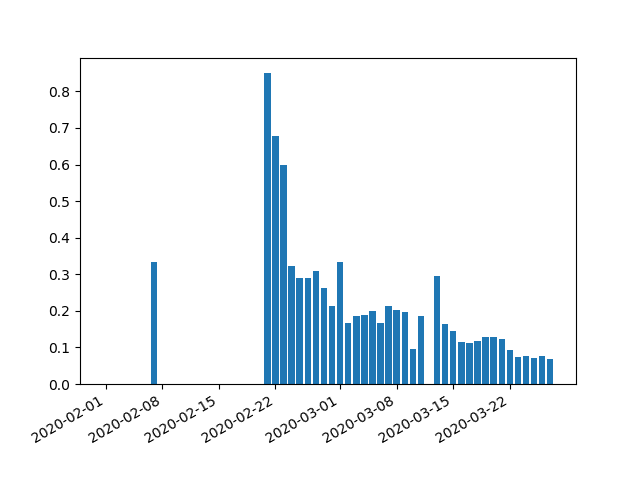

In [35]:
# Plot the relative increase per day

plt.figure('rel. zunahme pro tag')
plt.bar(x[j+1:], [(conf[i+j+1]-conf[i+j])/conf[i+j+1] 
                  for i in range(len(conf)-j-1)])
plt.gcf().autofmt_xdate()
plt.show()